In [1]:
from google.colab import drive
drive.mount('/content/drive') # Untuk Menyambungkan kedalam google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Membaca data dari file CSV, specify delimiter and encoding
data = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/bank-additional.csv',delimiter=";")

In [3]:
# Display the first few rows of the DataFrame
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# Memilih kolom fitur (X) dan target (Y) - Sesuaikan dengan dataset Anda
# Contoh: Menggunakan kolom terakhir sebagai target dan dua kolom pertama sebagai fitur
X = data.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir
Y = data.iloc[:, -1].values   # Kolom terakhir sebagai target

# Memeriksa hasilnya
print("Fitur (X):", X[:5])  # Menampilkan 5 baris pertama fitur
print("Target (Y):", Y[:5])  # Menampilkan 5 baris pertama target

Fitur (X): [[30 'blue-collar' 'married' 'basic.9y' 'no' 'yes' 'no' 'cellular' 'may'
  'fri' 487 2 999 0 'nonexistent' -1.8 92.893 -46.2 1.313 5099.1]
 [39 'services' 'single' 'high.school' 'no' 'no' 'no' 'telephone' 'may'
  'fri' 346 4 999 0 'nonexistent' 1.1 93.994 -36.4 4.855 5191.0]
 [25 'services' 'married' 'high.school' 'no' 'yes' 'no' 'telephone' 'jun'
  'wed' 227 1 999 0 'nonexistent' 1.4 94.465 -41.8 4.962 5228.1]
 [38 'services' 'married' 'basic.9y' 'no' 'unknown' 'unknown' 'telephone'
  'jun' 'fri' 17 3 999 0 'nonexistent' 1.4 94.465 -41.8 4.959 5228.1]
 [47 'admin.' 'married' 'university.degree' 'no' 'yes' 'no' 'cellular'
  'nov' 'mon' 58 1 999 0 'nonexistent' -0.1 93.2 -42.0 4.191 5195.8]]
Target (Y): ['no' 'no' 'no' 'no' 'no']


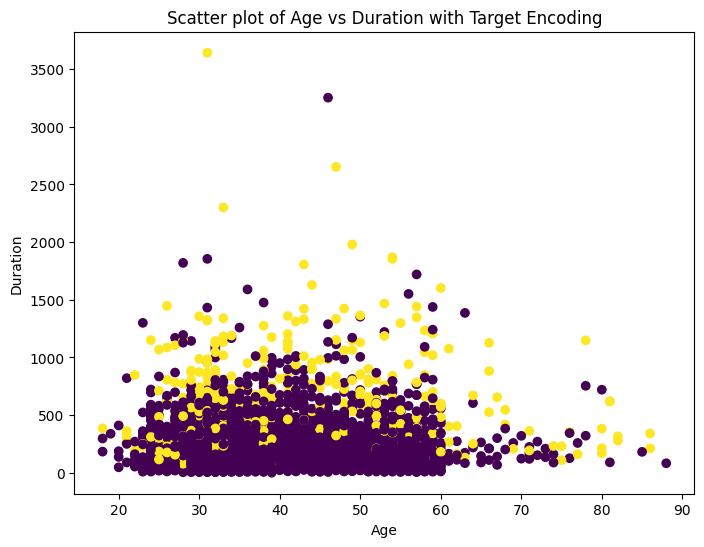

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

X = data[['age', 'duration']].values  # Memilih dua kolom sebagai fitur - Changed 'balance' to 'duration'
Y = data['y'].values  # Kolom 'y' sebagai target

# Encode target jika diperlukan (misalnya, "yes" menjadi 1, "no" menjadi 0)
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

# Plot
plt.figure(2, figsize=(8, 6))
plt.clf()  # Clear figure

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Age')
plt.ylabel('Duration')  # Changed ylabel to 'Duration'
plt.title('Scatter plot of Age vs Duration with Target Encoding')  # Changed title
plt.show()

Dari output scatter plot tersebut, kita dapat menganalisis bahwa sebagian besar data terpusat pada rentang usia 20 hingga 60 tahun dan durasi 0 hingga 1000, yang menunjukkan mayoritas kejadian terjadi pada kelompok usia produktif dengan durasi yang relatif rendah. Tidak terlihat adanya korelasi linear antara usia dan durasi, karena data tampak tersebar secara acak. Namun, dari pewarnaan variabel target (kuning dan ungu), terlihat bahwa kategori yang diwakili oleh warna kuning lebih sering terjadi pada durasi yang lebih tinggi, sedangkan kategori ungu lebih banyak muncul pada durasi yang lebih rendah. Jika variabel target ini misalnya merepresentasikan keberhasilan atau kegagalan suatu kejadian, maka ini menunjukkan kecenderungan bahwa durasi lebih panjang cenderung dikaitkan dengan satu kategori target tertentu. Selain itu, titik-titik yang berada di durasi sangat tinggi (misalnya di atas 2000) umumnya berasal dari individu dengan usia 30-50 tahun, menunjukkan bahwa durasi yang sangat panjang lebih jarang terjadi pada kelompok usia muda atau tua. Titik-titik outlier dengan durasi ekstrem ini juga penting untuk diperhatikan karena mungkin menunjukkan kasus unik atau spesifik yang dapat memberikan wawasan tambahan. Secara keseluruhan, meskipun tidak ada hubungan yang jelas antara usia dan durasi, distribusi warna target dapat memberikan indikasi awal mengenai bagaimana variabel target mungkin bervariasi di antara rentang usia dan durasi tertentu, dan analisis lebih lanjut diperlukan untuk mengonfirmasi pola ini secara statistik.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

# 1. Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

length_Train = len(X_train)
length_Test = len(X_test)

print("There are ", length_Train, "samples in the training set and", length_Test, "samples in the test set")

There are  2883 samples in the training set and 1236 samples in the test set


In [7]:
# 2. Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_standard = sc.transform(X_train)
X_test_standard = sc.transform(X_test)

print("X_train without standardising features")
print("--------------------------------------")
print(X_train[1:5, :])  # Menampilkan sampel awal sebelum standarisasi
print("")
print("X_train standardising features")
print("--------------------------------------")
print(X_train_standard[1:5, :])  # Menampilkan sampel awal setelah standarisasi

X_train without standardising features
--------------------------------------
[[ 36 296]
 [ 51  86]
 [ 43 246]
 [ 54 224]]

X_train standardising features
--------------------------------------
[[-0.39484622  0.16357306]
 [ 1.05293442 -0.65854929]
 [ 0.28078474 -0.03217036]
 [ 1.34249055 -0.11829746]]



Output ini menunjukkan hasil proses standardization (standarisasi) pada data latih (X_train). Standarisasi adalah teknik yang digunakan dalam prapemrosesan data untuk mengubah skala data agar memiliki rata-rata nol dan standar deviasi satu, yang dapat membantu meningkatkan kinerja algoritma pembelajaran mesin, terutama yang berbasis jarak seperti K-Nearest Neighbors (KNN) atau algoritma berbasis gradien.

Bagian bawah menunjukkan nilai fitur dalam X_train setelah proses standarisasi. Standarisasi mengubah setiap fitur agar memiliki nilai rata-rata 0 dan standar deviasi 1, sehingga data berada pada skala yang sama. Setelah standarisasi, nilai-nilai tersebut berubah menjadi angka desimal yang lebih kecil, misalnya -0.39 dan 0.16 untuk contoh pertama.

Perubahan ini dilakukan dengan rumus standarisasi:

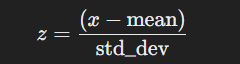

di mana 𝑥 adalah nilai asli, mean adalah rata-rata dari fitur tersebut, dan std_dev adalah standar deviasi fitur tersebut.

Secara keseluruhan, output ini menunjukkan perbandingan antara data mentah (X_train tanpa standarisasi) dan data yang sudah distandarisasi (X_train setelah standarisasi), yang sekarang berada dalam skala yang seragam dan lebih siap untuk digunakan dalam model pembelajaran mesin.

In [8]:
# Memilih kolom 'age' dan 'duration' untuk contoh data
train_data = data[['age', 'duration']].iloc[:3].values  # Mengambil 3 data pertama sebagai contoh train
test_data = data[['age', 'duration']].iloc[3:6].values  # Mengambil 3 data berikutnya sebagai contoh test
print("Train Data:")
print(train_data)
print("")
print("Test Data:")
print(test_data)
print("")

Train Data:
[[ 30 487]
 [ 39 346]
 [ 25 227]]

Test Data:
[[ 38  17]
 [ 47  58]
 [ 32 128]]



Output ini menunjukkan contoh data yang telah dibagi menjadi data latih dan data uji. Langkah ini penting untuk menghindari overfitting (model terlalu menyesuaikan diri dengan data latih) dan memastikan model mampu menggeneralisasi pada data baru.

In [9]:
# 1. Fit and Transform Train Data
sc = StandardScaler()
sc.fit(train_data)  # Menghitung rata-rata dan standar deviasi dari data pelatihan
train_data_scaled = sc.transform(train_data)

print("Train Data Scaled:")
print(train_data_scaled)
print("")

Train Data Scaled:
[[-0.23017414  1.25778894]
 [ 1.32350128 -0.06900588]
 [-1.09332714 -1.18878306]]



 Output ini menunjukkan bahwa data latih sudah melalui proses penskalaan, di mana nilai-nilai fitur telah diubah ke dalam skala yang lebih seragam. Dengan demikian, model akan lebih mudah mempelajari pola dari data tanpa terpengaruh oleh perbedaan skala antar fitur.

In [10]:
# 2. Demonstrating incorrect scaling (fit on test data instead of train data)
sc_test = StandardScaler()
sc_test.fit(test_data)  # Menghitung rata-rata dan standar deviasi dari data pengujian
test_data_scaled_incorrect = sc_test.transform(test_data)

print("Incorrectly Scaled Test Data (scaled with test parameters):")
print(test_data_scaled_incorrect)
print("")

Incorrectly Scaled Test Data (scaled with test parameters):
[[-0.16222142 -1.10557882]
 [ 1.29777137 -0.2109328 ]
 [-1.13554995  1.31651162]]



Kesalahan dalam penskalaan ini memperlihatkan risiko yang dapat menghambat model dalam membuat prediksi yang andal. Kesalahan dalam prapemrosesan data, terutama dalam penskalaan, dapat menghasilkan hasil evaluasi yang bias dan menurunkan kinerja model pada data uji. Oleh karena itu, konsistensi dalam penskalaan sangat penting untuk menjaga keandalan dan generalisasi model pada data baru.

In [11]:
# 3. Correct Scaling: Transform test data using training parameters
test_data_scaled_correct = sc.transform(test_data)

print("Correctly Scaled Test Data (scaled with training parameters):")
print(test_data_scaled_correct)

Correctly Scaled Test Data (scaled with training parameters):
[[ 1.15087068 -3.16486045]
 [ 2.70454609 -2.77905487]
 [ 0.11508707 -2.1203624 ]]


Output ini menunjukkan bahwa data uji telah disiapkan dengan baik untuk evaluasi model, dan model akan mampu mengaplikasikan pola yang dipelajari dari data latih secara lebih efektif.

In [12]:
from sklearn.linear_model import Perceptron

## Initialise the perceptron model with:
##   Max number of iterations = 40
##   Learning rate = 0.1
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0) # Changed 'n_iter' to 'max_iter'
ppn.fit(X_train_standard, Y_train)

Perceptron(eta0=0.1, max_iter=40)

In [13]:
Y_pred_perceptron = ppn.predict(X_test_standard)

from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_perceptron))

Accuracy: 0.83


accuracy_score dari sklearn.metrics digunakan untuk menghitung akurasi model. Akurasi diukur dengan membandingkan nilai sebenarnya dari label di data uji (Y_test) dengan nilai prediksi (Y_pred_perceptron) yang dihasilkan oleh model.
Rumus akurasi adalah:

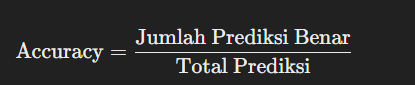

Dalam konteks ini, akurasi menunjukkan persentase prediksi model yang benar dibandingkan dengan keseluruhan prediksi pada data uji.

Secara keseluruhan, output ini menunjukkan bahwa model Perceptron telah dievaluasi menggunakan data uji, dan hasil akurasi sebesar 83% mengindikasikan bahwa model mampu melakukan prediksi yang benar dalam sebagian besar kasus di data uji.

In [14]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Initialize marker types and colors
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['#FF0000', '#0000FF', '#90EE90', '#808080', '#00FFFF']  # Gunakan kode warna hex
    color_map = ListedColormap(colors[:len(np.unique(y))])

    # Parameters for the graph and decision surface
    x1_min = X[:, 0].min() - 1
    x1_max = X[:, 0].max() + 1
    x2_min = X[:, 1].min() - 1
    x2_max = X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=color_map)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[color_map(idx)],
                    marker=markers[idx], label=cl)



If you are familiar with the perceptron model, you will recognise that the algorithm will never converge(perfectly classify) datasets that are not linearly separable. This is why the perceptron model is not recommendedfor datasets that are too simple and weak.


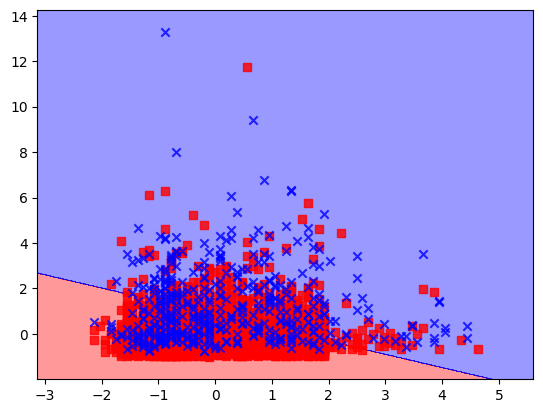

In [15]:
# Menggabungkan data pelatihan dan pengujian
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_combined_standard = np.vstack((X_train_standard, X_test_standard))
Y_combined = np.hstack((Y_train, Y_test))

# Menampilkan region keputusan untuk seluruh dataset
plot_decision_regions(X=X_combined_standard,
                      y=Y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))

print("")
print("If you are familiar with the perceptron model, you will recognise that the algorithm will never converge"
      "(perfectly classify) datasets that are not linearly separable. This is why the perceptron model is not recommended"
      "for datasets that are too simple and weak.")


Grafik ini menunjukkan hasil klasifikasi model Perceptron dengan menampilkan decision boundary atau batas keputusan yang memisahkan dua kelas. Area berwarna biru dan merah muda merepresentasikan wilayah yang diprediksi oleh model sebagai dua kelas berbeda, dengan garis lurus sebagai batas keputusan. Tanda silang biru (x) dan kotak merah (■) masing-masing menunjukkan titik data dari dua kelas berbeda dalam data asli. Model Perceptron berusaha memisahkan dua kelas tersebut menggunakan batas linier, namun tidak sempurna, terlihat dari beberapa titik biru di area merah muda dan titik merah di area biru, yang menandakan kesalahan klasifikasi. Distribusi titik data yang cukup padat di sekitar garis batas menunjukkan adanya data yang saling tumpang tindih, sehingga model mengalami kesulitan dalam memisahkan kedua kelas secara akurat dengan batas linier. Kesalahan ini konsisten dengan akurasi 83% yang terlihat pada hasil sebelumnya, di mana sebagian besar prediksi benar namun ada beberapa kesalahan. Grafik ini memberikan wawasan tentang bagaimana model Perceptron bekerja dalam membagi kelas dengan batas linier, serta menunjukkan keterbatasan model dalam menangani data yang kompleks atau saling tumpang tindih.

In [16]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
# C = 1000 adalah parameter regularisasi, semakin tinggi nilainya, semakin rendah regularisasi
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_standard, Y_train)  # Melatih model dengan data pelatihan yang sudah distandarisasi

# Memeriksa hasil pelatihan model
print("Model Logistic Regression telah dilatih pada data Anda.")


Model Logistic Regression telah dilatih pada data Anda.


In [17]:
Y_pred_Logit = lr.predict(X_test_standard)

print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_Logit))

Accuracy: 0.90


Output ini mengindikasikan bahwa Logistic Regression adalah model yang efektif untuk dataset ini, dengan akurasi yang tinggi pada data uji. Model ini mampu mengklasifikasikan sebagian besar sampel dengan benar, yang menunjukkan bahwa model tersebut sesuai untuk memecahkan masalah klasifikasi pada data yang diberikan.

Nilai akurasi 0.90 atau 90% menunjukkan bahwa model Logistic Regression berhasil memprediksi dengan benar 90% dari sampel di data uji. Ini berarti model memiliki performa yang baik dan mampu mengklasifikasikan sebagian besar sampel secara akurat.

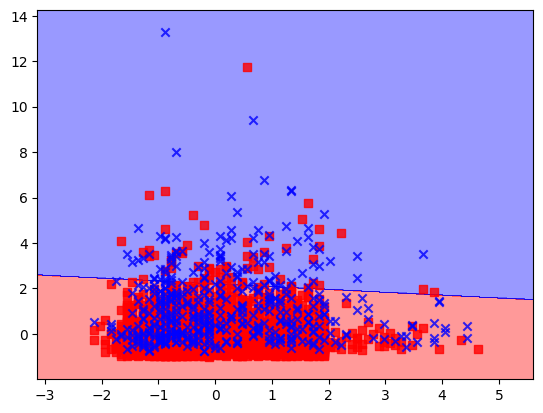

In [18]:
plot_decision_regions(X = X_combined_standard
                      , y = Y_combined
                      , classifier = lr
                      , test_idx = range(105,150))

Grafik ini menunjukkan bahwa Logistic Regression cukup efektif dalam memisahkan dua kelas di data ini, meskipun ada beberapa kesalahan di dekat garis batas. Batas keputusan linier cocok untuk data ini dan memberikan hasil yang baik dalam mengklasifikasikan sebagian besar titik dengan benar.

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree dengan criterion entropy dan max depth 3
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_standard, Y_train)  # Melatih model dengan data pelatihan yang sudah distandarisasi

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [26]:
Y_pred_tree = tree.predict(X_test)

print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_tree))

Accuracy: 0.10


Hasil ini menunjukkan bahwa model Decision Tree tidak mampu melakukan prediksi dengan baik pada data uji, yang mungkin menunjukkan bahwa model ini tidak cocok untuk dataset tersebut atau perlu dioptimalkan lebih lanjut. Hasil ini mengindikasikan bahwa ada permasalahan pada model, baik dari segi parameterisasi, prapemrosesan data, atau kompleksitas model yang mungkin terlalu tinggi atau terlalu rendah untuk data tersebut.

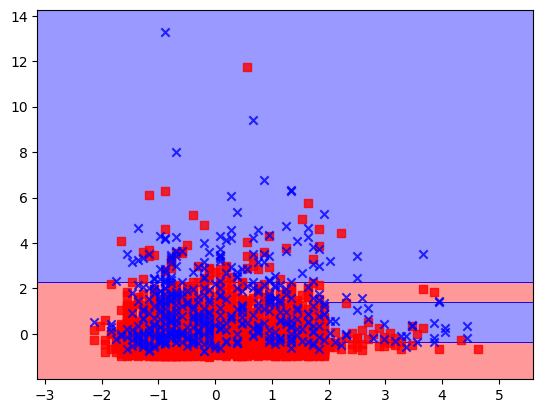

In [27]:
# Menggabungkan data pelatihan dan pengujian untuk visualisasi
X_combined_standard = np.vstack((X_train_standard, X_test_standard))
Y_combined = np.hstack((Y_train, Y_test))

# Menggambar decision regions untuk model Decision Tree
plot_decision_regions(X=X_combined_standard,
                      y=Y_combined,
                      classifier=tree,
                      test_idx=range(len(Y_train), len(Y_combined)))

Output ini menunjukkan bagaimana model Decision Tree memisahkan dua kelas berdasarkan pembagian ruang fitur yang fleksibel. Model ini mampu menciptakan batas keputusan yang lebih kompleks dibandingkan model linier, sehingga cocok untuk data yang tidak dapat dipisahkan dengan garis lurus. Namun, batas yang kompleks juga membawa risiko overfitting, yang perlu diperhatikan dalam proses pelatihan model.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model K-Nearest Neighbors dengan 5 neighbors dan metric minkowski
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_standard, Y_train)  # Melatih model dengan data pelatihan yang sudah distandarisasi

KNeighborsClassifier()

In [29]:
Y_pred_KNN = knn.predict(X_test_standard)

print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_KNN))

Accuracy: 0.89


Secara keseluruhan, output ini menunjukkan bahwa model K-Nearest Neighbors memiliki akurasi yang tinggi, yaitu 89%, yang menunjukkan kinerja yang baik dalam mengklasifikasikan data uji dan mengidentifikasi pola pada data yang mirip dengan data latih.

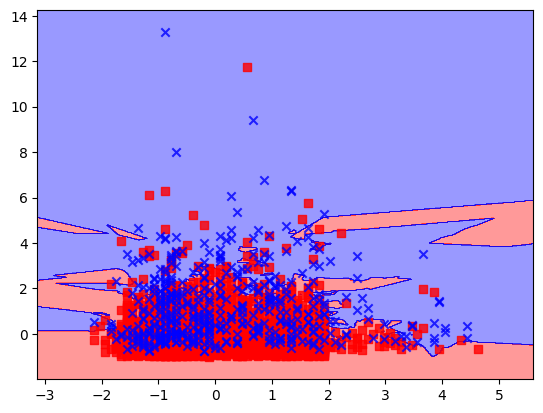

In [30]:
# Menggabungkan data pelatihan dan pengujian untuk visualisasi
X_combined_standard = np.vstack((X_train_standard, X_test_standard))
Y_combined = np.hstack((Y_train, Y_test))

# Menggambar decision regions untuk model K-Nearest Neighbors
plot_decision_regions(X=X_combined_standard,
                      y=Y_combined,
                      classifier=knn,
                      test_idx=range(len(Y_train), len(Y_combined)))

Visualisasi ini menunjukkan bahwa model KNN mampu memisahkan kelas dengan baik, tetapi batas keputusan yang sangat rumit menunjukkan kemungkinan overfitting. Menggunakan nilai k yang lebih besar dapat membantu menghaluskan batas keputusan dan meningkatkan kemampuan generalisasi model.

Secara keseluruhan, output ini menunjukkan karakteristik model KNN yang sangat responsif terhadap distribusi lokal data, namun mungkin kurang optimal dalam menghadapi variasi data baru yang tidak sepenuhnya mengikuti pola di data latih

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Inisialisasi model XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb.fit(X_train_standard, Y_train)  # Melatih model dengan data pelatihan yang sudah distandarisasi

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:43:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [32]:
# Prediksi dengan model XGBoost
Y_pred_XGB = xgb.predict(X_test_standard)

In [33]:
# Menampilkan akurasi
accuracy_xgb = accuracy_score(Y_test, Y_pred_XGB)
print(f"Accuracy of XGBoost: {accuracy_xgb:.2f}")


Accuracy of XGBoost: 0.88


Secara keseluruhan, output ini menunjukkan bahwa model XGBoost berhasil mencapai akurasi 88%, yang menunjukkan kinerja yang baik dan kemampuan untuk memprediksi sebagian besar sampel dengan benar pada data uji.

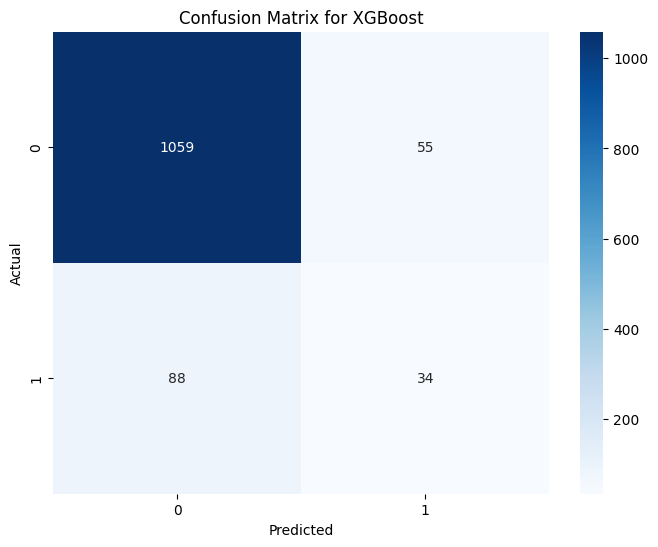

In [34]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_XGB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

Confusion matrix ini menunjukkan bahwa model XGBoost memiliki akurasi keseluruhan yang baik (88%), tetapi kinerjanya tidak merata antara kedua kelas. Model sangat akurat dalam mengklasifikasikan kelas "0" tetapi kurang efektif dalam mengklasifikasikan kelas "1", yang ditunjukkan oleh tingginya jumlah false negatives dan false positives untuk kelas "1". Jika kelas "1" adalah kelas yang penting (misalnya, kasus yang jarang tetapi kritis), mungkin diperlukan penyesuaian lebih lanjut, seperti penanganan ketidakseimbangan data atau tuning parameter model untuk meningkatkan kinerja pada kelas tersebut.

In [37]:
# Mendapatkan target names dalam format string
target_names = [str(cls) for cls in encoder.classes_]

# Classification Report
print("Classification Report for XGBoost:")
print(classification_report(Y_test, Y_pred_XGB, target_names=target_names))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1114
           1       0.38      0.28      0.32       122

    accuracy                           0.88      1236
   macro avg       0.65      0.61      0.63      1236
weighted avg       0.87      0.88      0.88      1236



Classification report ini menunjukkan bahwa model XGBoost bekerja dengan baik secara keseluruhan, terutama dalam mendeteksi kelas mayoritas (kelas "0"). Namun, kinerja yang rendah pada kelas minoritas (kelas "1") menunjukkan bahwa model mungkin perlu dioptimalkan untuk mendeteksi kelas ini lebih baik, misalnya dengan menangani ketidakseimbangan kelas menggunakan teknik seperti resampling atau class weighting.

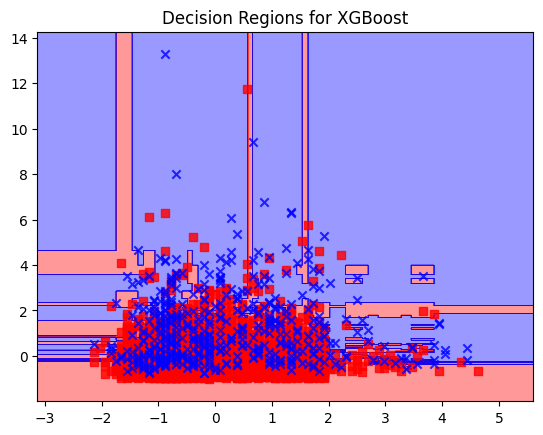

In [38]:
# Visualisasi Decision Regions untuk XGBoost
plot_decision_regions(X=X_combined_standard,
                      y=Y_combined,
                      classifier=xgb,
                      test_idx=range(len(Y_train), len(Y_combined)))
plt.title('Decision Regions for XGBoost')
plt.show()

Gambar ini menunjukkan bahwa model XGBoost mampu membentuk batas keputusan yang sangat kompleks dan rinci untuk memisahkan dua kelas. Sementara kompleksitas ini dapat membantu mengklasifikasikan data dengan akurat, ada indikasi bahwa model mungkin terlalu spesifik terhadap data latih (overfitting), terutama jika batas keputusan tampak terlalu berlekuk-lekuk dan penuh dengan area kecil yang terisolasi. Untuk memastikan kinerja yang baik pada data baru, disarankan untuk melakukan validasi silang (cross-validation) dan menyesuaikan parameter model agar batas keputusan menjadi lebih sederhana, sehingga model mampu menggeneralisasi dengan lebih baik pada data uji.

In [39]:
from sklearn.model_selection import GridSearchCV

# 1. Hyperparameter Tuning untuk XGBoost
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train_standard, Y_train)
print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")
print(f"Best XGBoost Accuracy: {xgb_grid.best_score_:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost Accuracy: 0.90


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:47:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gambar ini menunjukkan bahwa model XGBoost telah menjalani proses hyperparameter tuning menggunakan GridSearchCV dengan 5-fold cross-validation pada 108 kombinasi parameter, menghasilkan akurasi terbaik sebesar 90% dengan parameter-parameter optimal. Proses ini bertujuan untuk menemukan konfigurasi yang paling efektif untuk meningkatkan kinerja model, dan hasilnya menunjukkan bahwa model mencapai performa yang baik dengan kombinasi parameter tersebut.

In [40]:
# 2. Hyperparameter Tuning untuk Logistic Regression
lr_params = {'C': [0.1, 1, 10, 100, 1000]}
lr = LogisticRegression(random_state=0)
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
lr_grid.fit(X_train_standard, Y_train)
print(f"Best Logistic Regression Parameters: {lr_grid.best_params_}")
print(f"Best Logistic Regression Accuracy: {lr_grid.best_score_:.2f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Logistic Regression Parameters: {'C': 1}
Best Logistic Regression Accuracy: 0.90


Proses hyperparameter tuning ini menunjukkan bahwa nilai optimal untuk parameter C adalah 1, dengan akurasi terbaik sebesar 90%. Ini menunjukkan bahwa model Logistic Regression bekerja dengan baik pada dataset ini dengan tingkat regulasi yang seimbang (tidak terlalu besar atau kecil).

In [42]:
# 3. Hyperparameter Tuning untuk Decision Tree
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
tree = DecisionTreeClassifier(random_state=0)
tree_grid = GridSearchCV(estimator=tree, param_grid=tree_params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
tree_grid.fit(X_train, Y_train)
print(f"Best Decision Tree Parameters: {tree_grid.best_params_}")
print(f"Best Decision Tree Accuracy: {tree_grid.best_score_:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.90


Secara keseluruhan, output ini menunjukkan bahwa GridSearchCV berhasil menemukan konfigurasi parameter terbaik untuk model Decision Tree, yaitu parameter yang memberikan akurasi terbaik sebesar 90% pada data latih menggunakan cross-validation.

In [43]:
# 4. Hyperparameter Tuning untuk K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
knn_grid.fit(X_train_standard, Y_train)
print(f"Best KNN Parameters: {knn_grid.best_params_}")
print(f"Best KNN Accuracy: {knn_grid.best_score_:.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best KNN Parameters: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 2}
Best KNN Accuracy: 0.90


Secara keseluruhan, output ini menunjukkan bahwa GridSearchCV berhasil menemukan konfigurasi parameter terbaik untuk model KNN, yaitu parameter yang memberikan akurasi terbaik sebesar 90% pada data latih menggunakan cross-validation.

In [44]:
# 5. Parameter grid untuk tuning XGBoost
xgb_params = {
    'max_depth': [3, 5, 7],           # Kedalaman maksimum pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Laju pembelajaran
    'n_estimators': [50, 100, 200],   # Jumlah estimator
    'subsample': [0.8, 1.0],          # Rasio sampling
    'colsample_bytree': [0.8, 1.0]    # Rasio sampling fitur
}
# Inisialisasi model XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# GridSearchCV untuk hyperparameter tuning
xgb_grid = GridSearchCV(estimator=xgb,
                        param_grid=xgb_params,
                        scoring='accuracy',
                        cv=5,  # 5-fold cross-validation
                        verbose=1,
                        n_jobs=-1)

# Melatih model dengan data pelatihan yang sudah distandarisasi
xgb_grid.fit(X_train_standard, Y_train)

# Menampilkan hasil tuning
print(f"Best Parameters for XGBoost: {xgb_grid.best_params_}")
print(f"Best Cross-Validation Accuracy for XGBoost: {xgb_grid.best_score_:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy for XGBoost: 0.90


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:50:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [46]:
# Melatih ulang model dengan parameter terbaik
best_xgb = xgb_grid.best_estimator_
best_xgb.fit(X_train_standard, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:51:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [47]:
# Evaluasi model XGBoost yang dituning
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Y_pred_XGB_tuned = best_xgb.predict(X_test_standard)

In [48]:
# Akurasi
accuracy_tuned = accuracy_score(Y_test, Y_pred_XGB_tuned)
print(f"Accuracy of Tuned XGBoost: {accuracy_tuned:.2f}")

Accuracy of Tuned XGBoost: 0.89


Secara keseluruhan, output ini menunjukkan bahwa proses tuning berhasil menghasilkan model XGBoost yang optimal, dengan akurasi 89% pada data uji, menunjukkan bahwa model mampu melakukan prediksi dengan cukup baik pada data yang belum pernah dilihat.

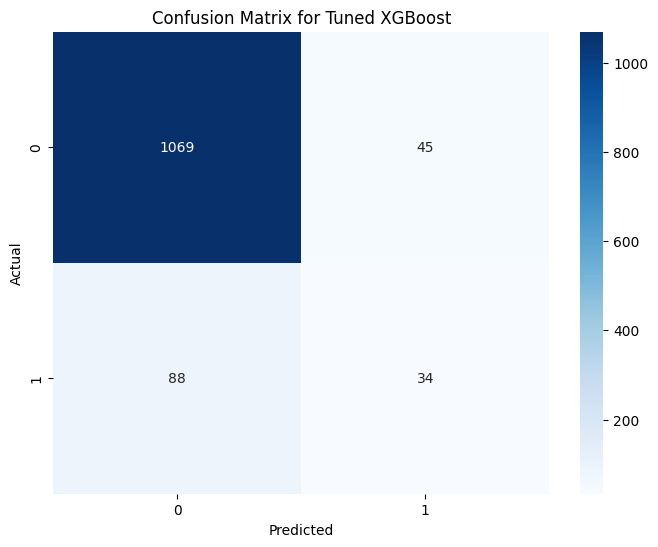

In [49]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, Y_pred_XGB_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned XGBoost')
plt.show()

Secara keseluruhan, confusion matrix ini mengindikasikan bahwa model XGBoost mampu memprediksi sebagian besar sampel dengan benar, terutama pada kelas mayoritas (kelas "0"). Namun, kinerjanya pada kelas minoritas (kelas "1") masih perlu ditingkatkan.

In [50]:
# Classification Report
target_names = [str(cls) for cls in encoder.classes_]
print("Classification Report for Tuned XGBoost:")
print(classification_report(Y_test, Y_pred_XGB_tuned, target_names=target_names))

Classification Report for Tuned XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1114
           1       0.43      0.28      0.34       122

    accuracy                           0.89      1236
   macro avg       0.68      0.62      0.64      1236
weighted avg       0.88      0.89      0.88      1236



Secara keseluruhan, classification report ini menunjukkan bahwa model XGBoost yang telah dituning mampu memberikan kinerja yang baik secara keseluruhan, terutama pada kelas mayoritas, tetapi kinerjanya pada kelas minoritas masih perlu ditingkatkan.